In [1]:
#PDF
import PyPDF2
import re
import pandas as pd
import glob
from tabula import read_pdf
import numpy as np
import openpyxl
import fitz
import os
import bs4 as bs
#Selenium
#import selenium
#from selenium import webdriver
import json
import shutil
#import pdfkit
#import wkhtmltopdf
import requests
import time
import string
from string import digits
### for sentiment analysis ###
import nltk
from nltk.corpus import stopwords
import string
import nltk.data
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
import spacy
from spacy.lang.en import English 
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\emily\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
co = pd.read_csv('C:/Users/emily/Documents/DePaul/MS Predictive Analytics/2021/Data Science Capstone/final_project_files/tempURL_rev.csv')
co.head()

,ticker,url_10k,new_url
0,ORLY,https://www.sec.gov/Archives/edgar/data/898173...,https://www.sec.gov/Archives/edgar/data/898173...
1,KO,https://www.sec.gov/Archives/edgar/data/317540...,https://www.sec.gov/Archives/edgar/data/317540...
2,SHLDQ,https://www.sec.gov/Archives/edgar/data/131006...,https://www.sec.gov/Archives/edgar/data/131006...
3,AZO,https://www.sec.gov/Archives/edgar/data/866787...,https://www.sec.gov/Archives/edgar/data/866787...
4,AAP,https://www.sec.gov/Archives/edgar/data/115844...,https://www.sec.gov/Archives/edgar/data/115844...


In [3]:
def ticker_url(tick_col, url_col):
    co_dict = {}
    for k,v in zip(tick_col,url_col):
        co_dict[k] = v
    return co_dict
#ticker_url(co['ticker'],co['url_10k'])

In [4]:
co_info = ticker_url(co['ticker'],co['url_10k'])

In [5]:
co_info

{'ORLY': 'https://www.sec.gov/Archives/edgar/data/898173/000089817317000091/orly-20161231x10xk.htm',
 'KO': 'https://www.sec.gov/Archives/edgar/data/317540/000156459017004316/coke-10k_20170101.htm',
 'SHLDQ': 'https://www.sec.gov/Archives/edgar/data/1310067/000131006717000005/shld201610k.htm',
 'AZO': 'https://www.sec.gov/Archives/edgar/data/866787/000119312517319357/d447746d10k.htm',
 'AAP': 'https://www.sec.gov/Archives/edgar/data/1158449/000115844917000034/aap_10kx12312016.htm',
 'ARMK': 'https://www.sec.gov/Archives/edgar/data/1584509/000158450917000247/fy2017aramark10-k.htm',
 'HAL': 'https://www.sec.gov/Archives/edgar/data/45012/000004501217000047/hal_12312016-10k.htm',
 'WMT': 'https://www.sec.gov/Archives/edgar/data/104169/000010416917000021/wmtform10-kx1312017.htm',
 'TSN': 'https://www.sec.gov/Archives/edgar/data/100493/000010049317000133/tsn201710kq4.htm',
 'ARG': 'https://www.sec.gov/Archives/edgar/data/804212/000080421216000048/arg-33116form10xk.htm',
 'KMI': 'https://www.

## Get n amount of companies from dictionary

To use for sentiment analysis

Help from:

https://highdemandskills.com/using-regular-expressions-to-search-sec-10k-filings/

In [6]:
def n_companies(n):
    companies = {k:co_info[k] for k in sorted(co_info.keys())[:n]}
    return companies
#n_companies(50)

In [7]:
#n_companies(2)

In [8]:
sent_dict = n_companies(2) #50 companies
#sent_dict

In [9]:
def initialize_txt():
    d = {}
    start = time.time()
    for key, value in co_info.items():
        #if key =='ORLY':
        #print(key)
        r = requests.get(value)
        #print(r)
        html_page = r.content
        soup = bs.BeautifulSoup(html_page,'html.parser')
        text = soup.find_all(text = True)
        #void_set = set([t.parent.name for t in text]) #text contents
        #print(void_set)
        void = ['[document]','a','noscript','html','meta', 'input','script','description','filename']
        #print(void)
        output = ''
        for t in text:
            #print(t)
            if t.parent.name not in void:
                #print(t)
                output += '{} '.format(t)
                d[key] = output
                end = time.time()
    print((end - start)/60,'mins')
    return d
    
#initialize_txt()

In [10]:
og_txt_dict = initialize_txt()

13.55099683602651 mins


In [11]:
og_txt_dict['ORLY']

'\n 10-K\n 1\n \n html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd" \n \n  Document created using Wdesk 1  \n  Copyright 2017 Workiva  \n Document \n \n UNITED STATES SECURITIES AND EXCHANGE COMMISSION WASHINGTON, DC 20549 \xa0 \xa0 \xa0 FORM 10-K \xa0 \xa0 \xa0 x ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the fiscal year ended  December\xa031, 2016   OR ¨ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the transition period from ________ to ________ \xa0 \xa0 \xa0 O’REILLY AUTOMOTIVE, INC. (Exact name of registrant as specified in its charter) \xa0 \xa0 \xa0 Missouri \xa0 000-21318 \xa0 27-4358837 (State or other jurisdiction \xa0 Commission file \xa0 (I.R.S. Employer of incorporation or organization) \xa0 number \xa0 Identification No.) 233 South Patterson Avenue Springfield, Missouri 65802 (Address of principal executive offices, Zip code) (417) 862-67

In [12]:
#og_txt_dict

In [13]:
del og_txt_dict['CHK'] #wrong link

In [14]:
del og_txt_dict['NGL'] #wrong link

In [15]:
del og_txt_dict['CAH'] #key error

In [16]:
del og_txt_dict['MMM'] #key error

In [17]:
del og_txt_dict['LLY'] #key error

In [18]:
del og_txt_dict['EMR'] #key error

In [19]:
del og_txt_dict['GIS'] #key error

In [20]:
del og_txt_dict['BBBY'] #key error

In [21]:
del og_txt_dict['AMAT'] #key error

In [22]:
del og_txt_dict['OXY'] #key error

In [23]:
del og_txt_dict['GWW'] #key error

In [24]:
del og_txt_dict['TSCO'] #key error

In [25]:
del og_txt_dict['GLP']  #words not coming through
del og_txt_dict['PPG']
del og_txt_dict['MRK']
del og_txt_dict['JWN']
del og_txt_dict['WRK']
del og_txt_dict['RAI']
del og_txt_dict['LAD']
del og_txt_dict['BURL']
del og_txt_dict['SEE']
del og_txt_dict['KO']
del og_txt_dict['CE'] 

In [26]:
len(og_txt_dict)

128

In [27]:
def item7_dict():
    start_dict = {} #item7 start
    end_dict = {} #item7 end
    txt_dict = {} #item7 text
    start = time.time()

    for key,value in og_txt_dict.items():
        #print(key)
        matches = re.compile(r'(item\s(7[\.\s]|8[\.\s])|discussion\sand\sanalysis\sof\s(consolidated\sfinancial|financial)\scondition|(consolidated\sfinancial|financial)\sstatements\sand\ssupplementary\sdata)', re.IGNORECASE)
        matches_array = pd.DataFrame([(match.group(), match.start(),key) for match in matches.finditer(value)])# Set columns in the dataframe
        #print(matches_array)
        #print(key)
        matches_array.columns = ['SearchTerm', 'Start','Ticker']# Get the number of rows in the dataframe

        #print(matches_array)
        Rows = matches_array['SearchTerm'].count()
        #print(Rows)
        #print(matches_array)
    
        # Create a new column in 'matches_array' called 'Selection' and add adjacent 'SerchTerm' (i and i+1 rows) text concatenated
        count = 0 # Counter to help with row location and iteration
        while count < (Rows-1): # Can only iterate to the second last row
            matches_array.at[count,'Selection'] = (matches_array.iloc[count,0] + matches_array.iloc[count+1,0]).lower() # Convert to lower case
            count += 1
   
    
    
        # Set up 'Item 7/8 Search Pattern' regex patterns
        matches_item7 = re.compile(r'(item\s7\.discussion\s[a-z]*)')
        matches_item8 = re.compile(r'(item\s8\.(consolidated\sfinancial|financial)\s[a-z]*)')
    
        # Find and store the locations of Item 7/8 Search Pattern matches
        count = 0 # Set up counter
        while count < (Rows-1): # Can only iterate to the second last row 
        # Match Item 7 Search Pattern
            if re.match(matches_item7, matches_array.at[count,'Selection']):
                # Column 1 = 'Start' column in 'matches_array'
                start_dict[key] = matches_array.iloc[count,1]
  
            # Match Item 8 Search Pattern
            if re.match(matches_item8, matches_array.at[count,'Selection']):  
                end_dict[key] = matches_array.iloc[count,1]
  
            count += 1
        item7 = og_txt_dict[key][start_dict[key]:end_dict[key]]
        txt_dict[key] = item7
        end = time.time()

    print(end - start,'seconds')
    return txt_dict

In [28]:
item7 = item7_dict()

5.159035682678223 seconds


In [29]:
def remove_digits(dict1):
    item7 = {}
    for key, value in dict1.items():
        remove_digits = str.maketrans('','',digits) #remove digits
        value = value.translate(remove_digits)
        item7[key] = value
    return item7


In [30]:
item7 = remove_digits(item7)

In [31]:
first5pairs = {k: item7[k] for k in list(item7)[:5]}
#first5pairs = {k: item7[k] for k in list(item7)} 

In [32]:
#del first5pairs['KO'] #blank

In [33]:
len(item7) #companies captured

128

### Sentiment

In [34]:
#getting string and processing it 
def remove_special_char(document):  #takes a string input called "document" and returns output string without certain special chars 
    no_punct = []
    for i in document:
        if (i == "$" or i == "%" or i == "," or i == '-' or i =='—' or i == '•' or i == "(" or i =='`' or i == ")" or i == '®' or i == "/" or i == '•' or i =='\xa0'): #removing all of these special characters 
            continue
        else:
            no_punct.append(i) #append all else to the list
         
    no_punct1 = ''.join(no_punct) #reappending string together without digits
    #print(no_punct1)
    return no_punct1

In [35]:
def read_10k_output(text_dict):  #read in dictionary with text & ticker, plus class labels csv
    
    text_data = []
    ticker_tabs = []
    
    for key in text_dict:                            # read through every key that is in our input dict 
        
        print("Reading ticker text from: {}".format(key))  # letting the user know what ticker were on
        ticker_text = text_dict[key]                       # get the text for that ticker 
        
        no_special_char = remove_special_char(ticker_text) # takes a string input and returns output string without certain special chars 
        no_nums = spacy_clean(no_special_char)             # using spacy to remove numbers & stop words
        lemma_single_string = nltk_tokens(no_nums)         # will lemmatize our tokens and assign a predicted POS
        
        text_data.append(lemma_single_string)
        ticker_tabs.append(key)                            # create a list with all our ticker names 
    
    return text_data, ticker_tabs

In [36]:
# using spacy for more preprocessing 
def spacy_clean(noPunct):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(noPunct)                     # using spacy to get our numbers in its own token

    tokenList = []
    for token in doc:
        if token.is_space or token.like_num or token.is_stop: #removes all tokens that resemble numbers (floats and regular) or is a space or a stop word 
            pass
        else:
            lowertoken = (token.orth_).lower() #getting relevant tokens and lowercasing the string
            tokenList.append(lowertoken)

    output = " ".join(tokenList) 
  #  print(output)
    return output



In [37]:
cachedStopWords = stopwords.words("english")
punct_set = set(string.punctuation)

In [38]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\emily\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [39]:
class LemmatizationWithPOSTagger(object): 
    def __init__(self):
        pass
    def get_wordnet_pos(self,treebank_tag): 
        """
        return WORDNET POS compliance to WORDENT lemmatization (a,n,r,v) 
        """
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            # As default pos in lemmatization is Noun
            return wordnet.NOUN

    def pos_tag(self,tokens):
        pos_tokens = [nltk.pos_tag(token) for token in tokens]  #get the non-lemmatized token with the predicted POS in a tuple
        #print("printing pos_tokens {}".format(pos_tokens))
        pos_tokens = [ [(word, lemmatizer.lemmatize(word,self.get_wordnet_pos(pos_tag)), [pos_tag]) for (word,pos_tag) in pos] for pos in pos_tokens]

        #lemmatizing based on POS 

        #print(pos_tokens)
        return pos_tokens

In [40]:
lemmatizer = WordNetLemmatizer()
lemmatization_using_pos_tagger = LemmatizationWithPOSTagger()

In [41]:
def nltk_tokens(noSpecChars):
    sentences = nltk.sent_tokenize(noSpecChars) #break up into sentences
#    print(sentences)
    tokens = [nltk.word_tokenize(sent) for sent in sentences] #breakdown further in to words
       
    for sent in tokens: 
        for word in sent:            
            if word in punct_set:   #remove punct 
                sent.remove(word)

 #   print(tokens)           #creates a list of lists (words in each sentence as strings)    
    tokens = lemmatization_using_pos_tagger.pos_tag(tokens) #EXAMPLE: ('reported', 'report', ['VBD']) -  RIGHTONE creates a nested list containing tuples
    lemma_string = ''

    for sent in tokens: 
        for word in sent:
            if len(word) <= 2: #updated this part !!!!
                pass
            else:
                lemma_string = lemma_string + ' ' + word[1]
   
    #print("printing lemma_string {}".format(lemma_string))   
    return lemma_string

In [42]:
#read_10k_output(first5pairs)   #only taking the 1st 5 companies for testing 

In [43]:
def get_class_labels(ticker_tabs, class_labels):
    y = []    
    for ticker in ticker_tabs:        
        
        row = class_labels[class_labels['ticker_name'].str.match(ticker)] # get the row where the ticker name matches 
        label = row['class'].values[0]       
        y.append(label)
   
#    print("y: {}".format(y))
#    print(ticker_tabs)
    return y

In [92]:
def vectorize(text_data, ticker_tabs):
    tf_idf_vectorizer = TfidfVectorizer(use_idf=True, stop_words=stopwords.words('english')) #only unigrams 
    tf_idf_output = tf_idf_vectorizer.fit_transform(text_data)  #transform our processed text 
     
    #create dataframe
    tf_idf_df=pd.DataFrame(tf_idf_output.toarray(),columns=tf_idf_vectorizer.get_feature_names(),index=ticker_tabs)
    tf_idf_df = tf_idf_df.iloc[:,1660:]
    
    #print(tf_idf_df.iloc[:, 2:5]) ##updated 
    return tf_idf_df

In [65]:
#vectorize(first5pairs.values(),first5pairs.keys()) #for testing

,accompanying,accordance,according,accordingly,accordion,account,accountability,accountants,accounted,accounting,...,year,years,yen,yes,yet,yield,yields,york,yuan,zero
ORLY,0.000000,0.007421,0.002925,0.007421,0.000000,0.008774,0.000000,0.000000,0.000000,0.037105,...,0.244895,0.047000,0.000000,0.000000,0.002925,0.000000,0.000000,0.005191,0.000000,0.004188
SHLDQ,0.009101,0.019888,0.000636,0.010750,0.002256,0.008262,0.000910,0.001128,0.027072,0.055901,...,0.058051,0.043001,0.000000,0.000000,0.000636,0.002256,0.000000,0.000000,0.000000,0.000910
AZO,0.000000,0.002858,0.003380,0.017151,0.000000,0.003380,0.000000,0.000000,0.000000,0.037160,...,0.171508,0.060028,0.000000,0.005999,0.006759,0.000000,0.005999,0.000000,0.005999,0.000000
AAP,0.000000,0.011187,0.006613,0.005594,0.000000,0.000000,0.004735,0.000000,0.000000,0.036358,...,0.156619,0.044748,0.000000,0.000000,0.006613,0.000000,0.000000,0.000000,0.000000,0.000000
ARMK,0.003560,0.002103,0.000000,0.004205,0.000000,0.009944,0.000000,0.000000,0.000000,0.037847,...,0.151386,0.023128,0.004413,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [94]:
def train_test(X, y, tickers_selected, ticker_tabs): # using our ticker_selected as our test case and the rest as training data
#    X_test = pd.DataFrame() 
#    X_test = X_test.append(X.loc[tickers_selected])  # the 2 rows for X_test is saved (our selected tickers)
       
    # we want to get a list of the indexes of our Y class labels from y 
    # first need to get the indexes from our ticker_tabs to match those indexes with our class list     
#    y_test = []
#    for ticker in tickers_selected:              # ['AMAT','AAP'] 
#        tick_index = ticker_tabs.index(ticker)   # get the ticker index from ticker tabs 
#        t = y.pop(tick_index)                    # remove class item from y 
#        y_test.append(t)  
      
#    y_train = y
#    X = X.drop(tickers_selected, axis=0) # drop selected ticker rows from X 
#    X_train = X
    
    
    ############ Not using streamlit 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)
    
    
    print("X_train {}".format(X_train)) 
    print("y_train {}".format(y_train))
    print('\n')
    print("X_test: \n {}".format(X_test)) 
    print("y_test {}".format(y_test))      #...[1,0] 

    return X_train, X_test, y_train, y_test

In [47]:
tickers_selected = ['ORLY', 'AZO'] # this is coming from streamlit. the company selections by user 

### Prediction of Sentiment 

In [48]:
from sklearn import naive_bayes, metrics, svm 
from sklearn.linear_model import LogisticRegression

In [95]:
def naive_bayes_classifier(X_train, X_test, y_train, y_test): 
    # train our model
    nbclf = naive_bayes.GaussianNB()        #initating our naive bayes classifier 
    nbclf = nbclf.fit(X_train, y_train)     #creating the naive bayes classifier and fitting the model with our training data - X and y
    
    # predict training
    nbpreds_train = nbclf.predict(X_train)  #predicting our y training data cases with training     
    print("Naive Bayes Training Accuracy:")
    print(metrics.accuracy_score(y_true = y_train, y_pred = nbpreds_train)) #calculating the training accuracy based on the predicted values
    
    # predict testing
    nbpreds_test = nbclf.predict(X_test)  #using test X to predict our test class values 
   
    # Testing performance metrics 
    print("Naive Bayes Testing Accuracy:")
    print(metrics.accuracy_score(y_true = y_test, y_pred = nbpreds_test))
    
    print("Naive Bayes Classification Report:")
    print(metrics.classification_report(y_test, nbpreds_test, target_names=['negative', 'positive'])) # 0=negative, 1=positive 
    
    print("Naive Bayes Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, nbpreds_test, labels=None)) # rownames=['Actual'], colnames=['Predicted']
    

In [50]:
def svm_model(X_train, X_test, y_train, y_test): # support vector machine classifer  
    svmclf = svm.SVC(random_state = 33)       # inialize SVM classifer and fit model 
    svmclf.fit(X_train,y_train)
    
    # predict training 
    svmpred_train = svmclf.predict(X_train)
    print("SVM Training Accuracy:")
    print(metrics.accuracy_score(y_true = y_train, y_pred = svmpred_train)) #calculating the training accuracy based on the predicted values
      
    # predict testing 
    svmclfpred_test = svmclf.predict(X_test)
    
    # Testing performance metrics 
    print("SVM Testing Accuracy:")
    print(metrics.accuracy_score(y_true = y_test, y_pred = svmclfpred_test))
    
    print("SVM Classification Report:")
    print(metrics.classification_report(y_test, svmclfpred_test, target_names=['negative', 'positive'])) # 0=negative, 1=positive 
    
    print("SVM Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, svmclfpred_test, labels=None)) # rownames=['Actual'], colnames=['Predicted']
       
    

In [101]:
def logistic_regression(X_train, X_test, y_train, y_test):
    logclf = LogisticRegression()            #model with default values 
    logclf.fit(X_train,y_train)              #fitting our LR model to the training X and y 
    
    # predict training 
    logpred_train = logclf.predict(X_train)   #predicting our train X with the model 
    print("Logistic Regression Training Accuracy:")
    print(metrics.accuracy_score(y_true = y_train, y_pred = logpred_train)) #calculating the training accuracy based on the predicted values
          
    # predict testing
    logpred_test = logclf.predict(X_test)
    
    # Testing performance metrics 
    print("Logistic Regression Testing Accuracy:")
    print(metrics.accuracy_score(y_true = y_test, y_pred = logpred_test))
    
    print("Logistic Regression Classification Report:")
    print(metrics.classification_report(y_test, logpred_test, target_names=['negative', 'positive'])) # 0=negative, 1=positive 
    
    print("Logistic Regression Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, logpred_test, labels=None)) # rownames=['Actual'], colnames=['Predicted']
    
    print("This are the predicted labels: {}".format(logpred_test))
    print("This are the actual labels: {}".format(y_test))
    print("This are the actual test X cases for companies: {}".format(X_test))

In [102]:
def main(tickers_selected): # main function reads in dictionary with text 
    class_labels = pd.read_csv("rev_dict_final_example.csv") # read in ticker names with class labels 
    text = open("item7.txt", 'r', encoding="utf8")           # read in the item7 text from each ticker 
    data = text.read() 
    text_dict = eval(data)
    
#    global text_data, ticker_tabs
    text_data, ticker_tabs = read_10k_output(text_dict)
    
    y = get_class_labels(ticker_tabs, class_labels)
      
    X = vectorize(text_data, ticker_tabs)
#    print(X)
#    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test(X, y, tickers_selected, ticker_tabs)
    
    global clean_dict
    clean_dict = {'ticker_tabs':ticker_tabs, 'text_data':text_data}

    # Prediction #
    naive_bayes_classifier(X_train, X_test, y_train, y_test)
    svm_model(X_train, X_test, y_train, y_test)
    logistic_regression(X_train, X_test, y_train, y_test)
    
    
main(tickers_selected)

Reading ticker text from: ORLY
<class 'str'>
Reading ticker text from: SHLDQ
<class 'str'>
Reading ticker text from: AZO
<class 'str'>
Reading ticker text from: AAP
<class 'str'>
Reading ticker text from: ARMK
<class 'str'>
Reading ticker text from: HAL
<class 'str'>
Reading ticker text from: WMT
<class 'str'>
Reading ticker text from: TSN
<class 'str'>
Reading ticker text from: ARG
<class 'str'>
Reading ticker text from: KMI
<class 'str'>
Reading ticker text from: LKQ
<class 'str'>
Reading ticker text from: NOV
<class 'str'>
Reading ticker text from: LOW
<class 'str'>
Reading ticker text from: GT
<class 'str'>
Reading ticker text from: MAS
<class 'str'>
Reading ticker text from: PX
<class 'str'>
Reading ticker text from: PFGC
<class 'str'>
Reading ticker text from: HD
<class 'str'>
Reading ticker text from: KR
<class 'str'>
Reading ticker text from: SPLS
<class 'str'>
Reading ticker text from: PAGP
<class 'str'>
Reading ticker text from: BA
<class 'str'>
Reading ticker text from: UNFI

Naive Bayes Training Accuracy:
0.967032967032967
Naive Bayes Testing Accuracy:
0.5
Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.26      0.50      0.34        12
    positive       0.74      0.50      0.60        34

    accuracy                           0.50        46
   macro avg       0.50      0.50      0.47        46
weighted avg       0.61      0.50      0.53        46

Naive Bayes Confusion Matrix:
[[ 6  6]
 [17 17]]
SVM Training Accuracy:
0.967032967032967
SVM Testing Accuracy:
0.717391304347826
SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.33      0.08      0.13        12
    positive       0.74      0.94      0.83        34

    accuracy                           0.72        46
   macro avg       0.54      0.51      0.48        46
weighted avg       0.64      0.72      0.65        46

SVM Confusion Matrix:
[[ 1 11]
 [ 2 32]]
Logistic Regression Training A

,aaarated,aac,aap,aat,ab,abandon,abandoned,abandonment,abatacept,abatement,...,zircon,zirconium,zloty,zlotyeuro,zone,zonemonth,zoom,zoot,zweibrucken,²our
ORLY,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
SHLDQ,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
AZO,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
AAP,0.0,0.0,0.036294,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
ARMK,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BURL,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
OLN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
CC,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001837,...,0.004453,0.002227,0.0,0.0,0.018503,0.0,0.0,0.0,0.0,0.0
CE,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


# EDA

In [56]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [53]:
cleamtext_dataDF = pd.DataFrame.from_dict(clean_dict)

In [54]:
cleamtext_dataDF.head()

,ticker_tabs,text_data
0,ORLY,item management discussion analysis financial...
1,SHLDQ,item7 management discussion analysis financia...
2,AZO,item7 management discussion analysis financia...
3,AAP,item management ’ s discussion analysis finan...
4,ARMK,item management discussion analysis financial...


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

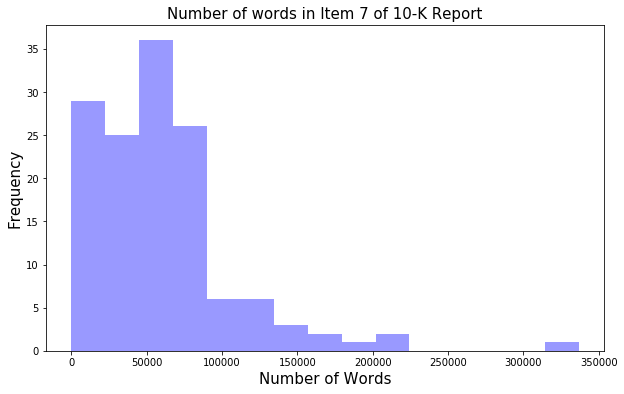

In [57]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(cleamtext_dataDF['text_data'].str.len(), kde=False, color='blue', bins=15)
plt.title('Number of words in Item 7 of 10-K Report', fontsize=15)
plt.xlabel("Number of Words", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

Text(0, 0.5, 'Frequency of Companies')

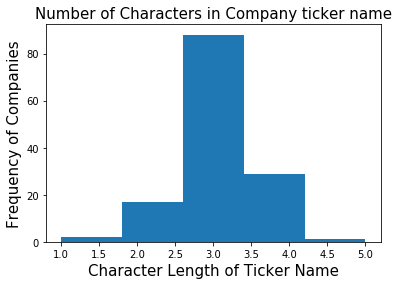

In [58]:
cleamtext_dataDF['ticker_tabs'].str.len().hist(bins=5, grid=False) #histogram of the length of company ticker name 
plt.title('Number of Characters in Company ticker name', fontsize=15)
plt.xlabel("Character Length of Ticker Name", fontsize=15)
plt.ylabel("Frequency of Companies",fontsize=15)

In [59]:
all_Text = cleamtext_dataDF['text_data']

In [60]:
from collections import Counter
word_count = Counter(" ".join(all_Text).split()).most_common(15)
countDF = pd.DataFrame(word_count, columns=['Token', 'Frequency']).drop(0, axis=0)
print(countDF)

        Token  Frequency
1         net      10609
2     company       9810
3    increase       8783
4        year       8539
5         tax       8516
6        cost       8487
7     include       8070
8        cash       8054
9      income       7955
10       rate       7510
11      asset       7477
12    expense       7215
13  financial       7123
14     result       7070


Text(0.5, 0, 'Token')

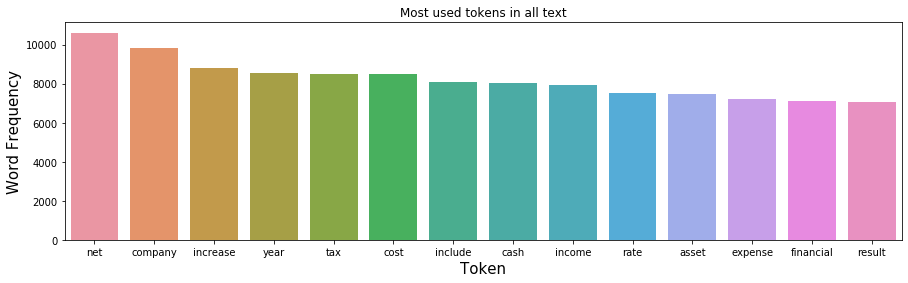

In [100]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Token", y = "Frequency", ax=ax, data=countDF)
plt.title('Most used tokens in all text')
plt.ylabel("Word Frequency", fontsize=15)
plt.xlabel("Token",fontsize=15)